In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
milk=pd.read_csv('milk.csv',index_col=0)
scalar=StandardScaler()
milkscaled=scalar.fit_transform(milk)

milkscaled=pd.DataFrame(milkscaled,columns=milk.columns,index=milk.index)

In [11]:
clust_DB = DBSCAN(eps=1,min_samples=2)
clust_DB.fit(milkscaled)
print(clust_DB.labels_)

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1 -1 -1  1  2  2  2 -1
 -1]


In [34]:
milkscaled['Clust'] = clust_DB.labels_
milk_scl_inliers = milkscaled[milkscaled['Clust']!=1]
print(silhouette_score(milk_scl_inliers.iloc[:,:-1],
                      milk_scl_inliers.iloc[:,-1]))

0.4456667238577395


In [35]:
eps_range=[0.2,0.4,0.6,1]
mp_range=[2,3,4,5]
dic={}

for i in eps_range:
    for j in mp_range:
        try:
            scalar=StandardScaler()
            milkscaled=scalar.fit_transform(milk)
            milkscaled=pd.DataFrame(milkscaled,columns=milk.columns,index=milk.index)
            clust_DB = DBSCAN(eps=i,min_samples=j)
            clust_DB.fit(milkscaled)
            milkscaled['Clust'] = clust_DB.labels_
            milk_scl_inliers = milkscaled[milkscaled['Clust']!=-1]
            dic[str(i)+','+str(j)]=silhouette_score(milk_scl_inliers.iloc[:,:-1],
                                                  milk_scl_inliers.iloc[:,-1])
        
        except:
            dic[str(i)+','+str(j)]=-1


        
      

In [41]:
dic

{'0.2,2': -1,
 '0.2,3': -1,
 '0.2,4': -1,
 '0.2,5': -1,
 '0.4,2': 0.6518937593821538,
 '0.4,3': 0.5385180352469559,
 '0.4,4': -1,
 '0.4,5': -1,
 '0.6,2': 0.5934459505692155,
 '0.6,3': 0.5344431042454363,
 '0.6,4': 0.5519747727201489,
 '0.6,5': -1,
 '1,2': 0.4344818095328392,
 '1,3': 0.6473871775367226,
 '1,4': -1,
 '1,5': -1}

In [ ]:
###########  plotting PCS ########################################

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

prcomp=PCA()
scores=prcomp.fit_transform(milkscaled.iloc[:,:5])
clust_DB = DBSCAN(eps=0.4,min_samples=2)
clust_DB.fit(milkscaled.iloc[:,:5])
print(clust_DB.labels_)


[-1  0  0 -1 -1  1  1  2 -1 -1  2  1 -1 -1  1  2 -1 -1 -1 -1  3  3 -1 -1
 -1]


In [49]:
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'Cluster':clust_DB.labels_})
df_PCs['Cluster']=df_PCs['Cluster'].astype(object)


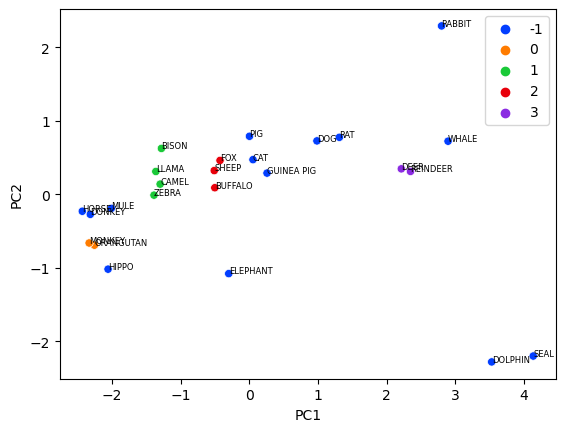

In [50]:
sns.scatterplot(data=df_PCs,x='PC1',palette='bright',y='PC2',hue='Cluster')
for i in np.arange(0,milk.shape[0]):
    plt.text(scores[i,0],scores[i,1],list(milk.index)[i],fontsize=6)
    
plt.legend(loc='best')
plt.show()